In [1]:
import pandas as pd
read=pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v2.csv',encoding='utf-8')

house_rate=read['HOUSE_RATE'].unique()
date=read['DATE_YM'].unique()
date
house_rate
read.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE_YM       4572 non-null   int64  
 1   STATES        4572 non-null   object 
 2   SIZE          4572 non-null   object 
 3   PRICE_MEDIAN  4572 non-null   float64
 4   COUNTS        4572 non-null   int64  
 5   CPI           4572 non-null   float64
 6   BASE_RATE     4572 non-null   float64
 7   CPI_YOY       4572 non-null   float64
 8   REAL_RATE     4572 non-null   float64
 9   HOUSE_RATE    4572 non-null   float64
 10  VARIABLED     4572 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 393.0+ KB


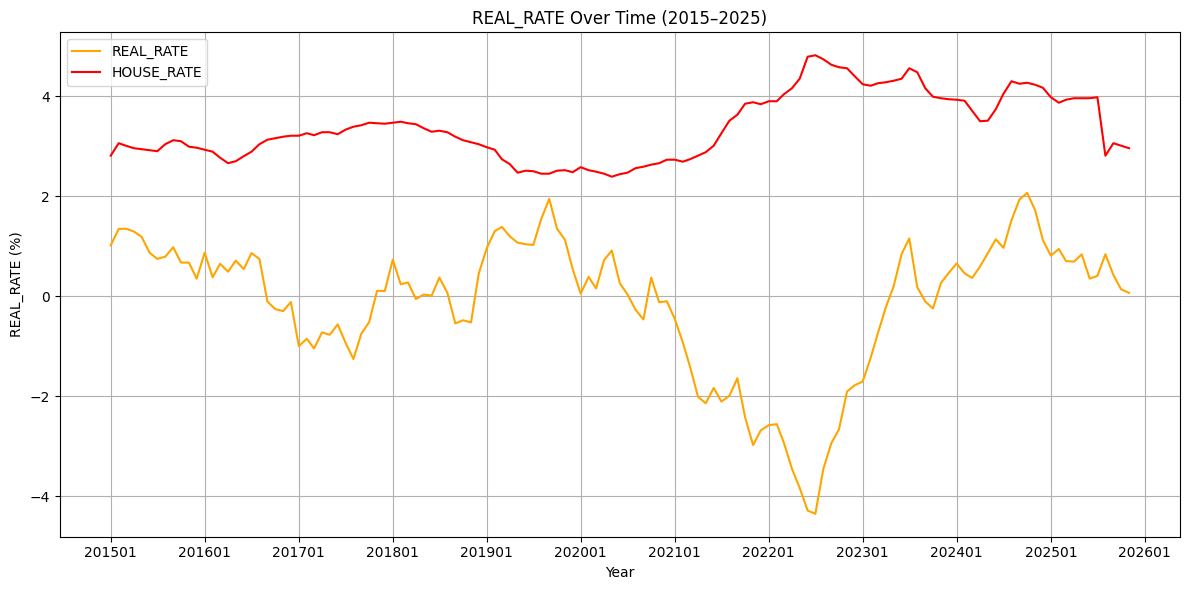

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

rate = pd.read_csv(
    '/home/hyuksu/projects/ml/project/데이터/2015_2025_cpi_기준금리_물가상승률_실질금리.csv',
    encoding='utf-8'
)
rate['HOUSE_RATE']=read['HOUSE_RATE']
rate["DATE"] = pd.to_datetime(rate["YYYYMM"], errors="coerce")

plt.figure(figsize=(12,6))
plt.plot(rate["DATE"], rate['REAL_RATE'], color='Orange', marker='', label='REAL_RATE')
plt.plot(rate["DATE"], rate['HOUSE_RATE'], color='red', marker='', label='HOUSE_RATE')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y%m"))

plt.xlabel("Year")
plt.ylabel("REAL_RATE (%)")
plt.title("REAL_RATE Over Time (2015–2025)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
rate

,YYYYMM,CPI,BASE_RATE,CPI_YOY,REAL_RATE,DATE
0,2015-01-01,94.643,1.990,0.974074,1.015926,2015-01-01
1,2015-02-01,94.587,1.990,0.645882,1.344118,2015-02-01
2,2015-03-01,94.596,1.820,0.470511,1.349489,2015-03-01
3,2015-04-01,94.625,1.730,0.436241,1.293759,2015-04-01
4,2015-05-01,94.890,1.740,0.552088,1.187912,2015-05-01
...,...,...,...,...,...,...
126,2025-07-01,116.520,2.500,2.094103,0.405897,2025-07-01
127,2025-08-01,116.450,2.506,1.667540,0.838460,2025-08-01
128,2025-09-01,117.060,2.526,2.102050,0.423950,2025-09-01
129,2025-10-01,117.420,2.516,2.380330,0.135670,2025-10-01


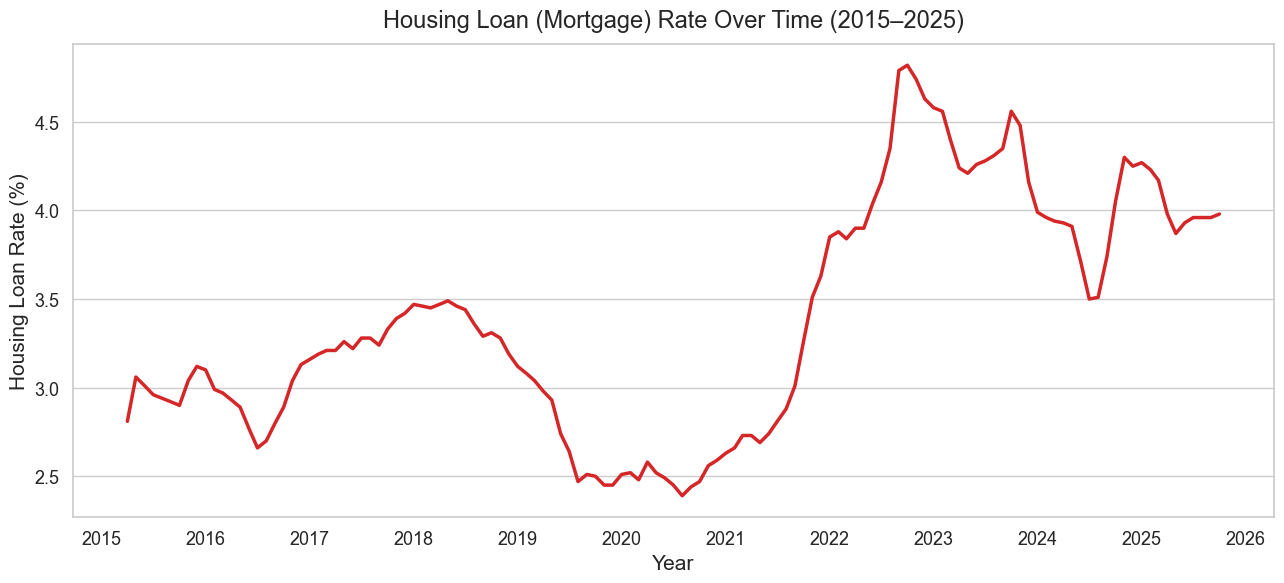

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

read = pd.read_csv(
    '/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v2.csv',
    encoding='utf-8'
)


df = read.sort_values("DATE_YM").copy()

# 🔥 핵심: YYYYMM → datetime (월 단위)
df["DATE"] = pd.to_datetime(
    df["DATE_YM"].astype(int).astype(str),
    format="%Y%m"
)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(13,6))

sns.lineplot(
    data=df,
    x="DATE",
    y="HOUSE_RATE",
    linewidth=2.5,
    color="tab:red",
    ax=ax
)

# ✅ x축 양식 완전 재설정
ax.xaxis.set_major_locator(mdates.YearLocator())          # 연도 tick
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # 연도만 표시
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)

ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Housing Loan Rate (%)", fontsize=15)
ax.set_title(
    "Housing Loan (Mortgage) Rate Over Time (2015–2025)",
    fontsize=17,
    pad=12
)

ax.grid(axis="x", visible=False)  # 세로 그리드 제거 (가독성↑)
plt.tight_layout()
plt.show()


In [11]:
read

,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,CPI,BASE_RATE,CPI_YOY,REAL_RATE,HOUSE_RATE,VARIABLED
0,201504,강남구,대형,128750.0,246,94.625,1.730,0.436241,1.293759,2.81,0.969868
1,201505,강남구,대형,133000.0,204,94.890,1.740,0.552088,1.187912,3.06,1.064000
2,201506,강남구,대형,131000.0,183,94.909,1.570,0.701341,0.868659,3.01,1.007692
3,201507,강남구,대형,139250.0,176,95.080,1.480,0.735279,0.744721,2.96,1.081553
4,201508,강남구,대형,135000.0,157,95.213,1.490,0.700151,0.789849,2.94,1.015038
...,...,...,...,...,...,...,...,...,...,...,...
4567,202506,중구,중형,120000.0,86,116.310,2.520,2.169712,0.350288,3.93,0.960000
4568,202507,중구,중형,115000.0,20,116.520,2.500,2.094103,0.405897,3.96,0.958333
4569,202508,중구,중형,129000.0,25,116.450,2.506,1.667540,0.838460,3.96,0.959108
4570,202509,중구,중형,137500.0,69,117.060,2.526,2.102050,0.423950,3.96,1.145833


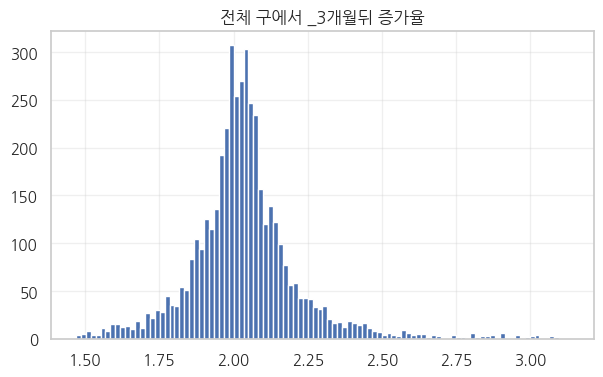

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

read['VARIABLED']=read['VARIABLED']+1
rc('font', family='NanumGothic')# For MacOS
x = read["VARIABLED"].dropna()

# 중심 구간만 자동으로 잡기 (이상치 제거용)
lo, hi = x.quantile([0.01, 0.99])

plt.figure(figsize=(7,4))
plt.hist(x, bins=100, range=(lo, hi))  # 🔥 핵심
plt.title("전체 구에서 _3개월뒤 증가율")
plt.grid(True, alpha=0.3)
plt.show()


In [13]:
import pandas as pd
read=pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v2.csv',encoding='utf-8')
read

,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,CPI,BASE_RATE,CPI_YOY,REAL_RATE,HOUSE_RATE,VARIABLED
0,201504,강남구,대형,128750.0,246,94.625,1.730,0.436241,1.293759,2.81,0.969868
1,201505,강남구,대형,133000.0,204,94.890,1.740,0.552088,1.187912,3.06,1.064000
2,201506,강남구,대형,131000.0,183,94.909,1.570,0.701341,0.868659,3.01,1.007692
3,201507,강남구,대형,139250.0,176,95.080,1.480,0.735279,0.744721,2.96,1.081553
4,201508,강남구,대형,135000.0,157,95.213,1.490,0.700151,0.789849,2.94,1.015038
...,...,...,...,...,...,...,...,...,...,...,...
4567,202506,중구,중형,120000.0,86,116.310,2.520,2.169712,0.350288,3.93,0.960000
4568,202507,중구,중형,115000.0,20,116.520,2.500,2.094103,0.405897,3.96,0.958333
4569,202508,중구,중형,129000.0,25,116.450,2.506,1.667540,0.838460,3.96,0.959108
4570,202509,중구,중형,137500.0,69,117.060,2.526,2.102050,0.423950,3.96,1.145833


In [14]:
read


,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,CPI,BASE_RATE,CPI_YOY,REAL_RATE,HOUSE_RATE,VARIABLED
0,201504,강남구,대형,128750.0,246,94.625,1.730,0.436241,1.293759,2.81,0.969868
1,201505,강남구,대형,133000.0,204,94.890,1.740,0.552088,1.187912,3.06,1.064000
2,201506,강남구,대형,131000.0,183,94.909,1.570,0.701341,0.868659,3.01,1.007692
3,201507,강남구,대형,139250.0,176,95.080,1.480,0.735279,0.744721,2.96,1.081553
4,201508,강남구,대형,135000.0,157,95.213,1.490,0.700151,0.789849,2.94,1.015038
...,...,...,...,...,...,...,...,...,...,...,...
4567,202506,중구,중형,120000.0,86,116.310,2.520,2.169712,0.350288,3.93,0.960000
4568,202507,중구,중형,115000.0,20,116.520,2.500,2.094103,0.405897,3.96,0.958333
4569,202508,중구,중형,129000.0,25,116.450,2.506,1.667540,0.838460,3.96,0.959108
4570,202509,중구,중형,137500.0,69,117.060,2.526,2.102050,0.423950,3.96,1.145833


In [15]:
read['STATES']

0       강남구
1       강남구
2       강남구
3       강남구
4       강남구
       ... 
4567     중구
4568     중구
4569     중구
4570     중구
4571     중구
Name: STATES, Length: 4572, dtype: object

STATES
노원구    71178
송파구    50750
강서구    45957
강남구    44010
양천구    36043
서초구    33859
도봉구    30769
관악구    23918
광진구    15853
용산구    15450
중구     10662
종로구     6388
Name: COUNTS, dtype: int64


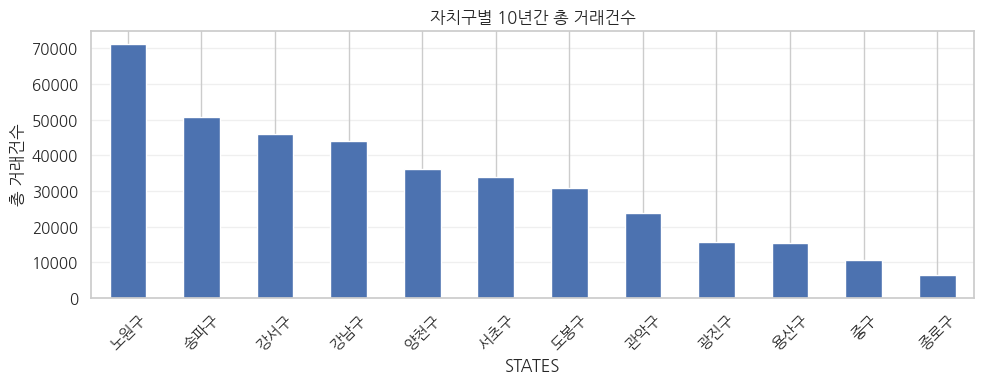

STATES
노원구    71178
송파구    50750
강서구    45957
강남구    44010
양천구    36043
서초구    33859
도봉구    30769
관악구    23918
광진구    15853
용산구    15450
중구     10662
종로구     6388
Name: COUNTS, dtype: int64

In [16]:
def analysis(data):
    import matplotlib.pyplot as plt
    from matplotlib import rc
    
    # 폰트 설정
    plt.rcParams['font.family'] = 'D2Coding'
    plt.rcParams['axes.unicode_minus'] = False
    rc('font', family='NanumGothic')
    # 자치구별 총 거래건수
    gu_counts = (
        data
        .groupby("STATES")["COUNTS"]
        .sum()
        .sort_values(ascending=False)
    )
    
    # 출력
    print(gu_counts)
    
    # 시각화
    plt.figure(figsize=(10,4))
    gu_counts.plot(kind="bar")
    plt.title("자치구별 10년간 총 거래건수")
    plt.ylabel("총 거래건수")
    plt.grid(axis="y", alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return gu_counts

analysis(read)
    
   

/tmp/ipykernel_73197/3790752863.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/3790752863.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/3790752863.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/3790752863.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/3790752863.py:82: UserWarning: set_

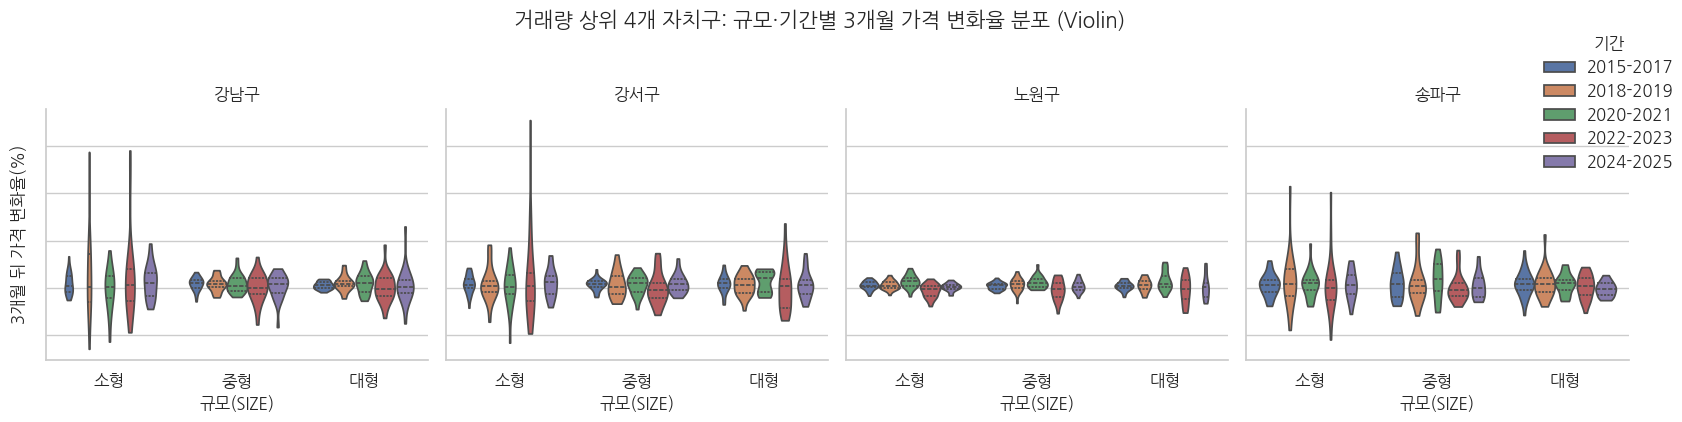

In [17]:
# =========================
# ✅ 전체 코드 (Top-4 거래량 구) × (SIZE) × (기간) 분포 시각화
# - catplot(kind="violin")에서 한글 깨짐 방지: axes별 폰트 강제 적용
# - YEAR_GROUP en-dash(–) 대신 ASCII '-' 사용
# =========================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ---------- 폰트 설정 ----------
# (WSL/Ubuntu 기준) 나눔고딕 경로가 다르면 fc-list로 확인해서 수정
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=FONT_PATH)

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False
sns.set_theme(style="whitegrid", font="NanumGothic")

# ---------- 1) Top-4 거래량 구 선택 ----------
top_states = (
    read.groupby("STATES")["COUNTS"]
        .sum()
        .sort_values(ascending=False)
        .head(4)
        .index
        .tolist()
)

df = read[read["STATES"].isin(top_states)].copy()

# ---------- 2) 연도/기간 구간 만들기 ----------
df["YEAR"] = (df["DATE_YM"].astype(int) // 100)

def year_group(y: int) -> str:
    if 2015 <= y <= 2017:
        return "2015-2017"
    elif 2018 <= y <= 2019:
        return "2018-2019"
    elif 2020 <= y <= 2021:
        return "2020-2021"
    elif 2022 <= y <= 2023:
        return "2022-2023"
    else:
        return "2024-2025"

df["YEAR_GROUP"] = df["YEAR"].apply(year_group)

# (선택) SIZE 순서 고정
df["SIZE"] = pd.Categorical(df["SIZE"], categories=["소형", "중형", "대형"], ordered=True)

# ---------- 3) Violin plot (Facet) ----------
g = sns.catplot(
    data=df,
    x="SIZE",
    y="VARIABLED",
    hue="YEAR_GROUP",
    col="STATES",
    kind="violin",
    inner="quartile",
    cut=0,
    height=4,
    aspect=0.95
)

g.set_axis_labels("규모(SIZE)", "3개월 뒤 가격 변화율(%)")
g.set_titles("{col_name}")

# 전체 제목(한글)
g.fig.suptitle(
    "거래량 상위 4개 자치구: 규모·기간별 3개월 가격 변화율 분포 (Violin)",
    fontproperties=font_prop,
    fontsize=15,
    y=1.05
)

# 🔥 핵심: FacetGrid 각 축에 폰트 강제 적용 (바이올린에서만 깨지는 문제 해결)
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontproperties=font_prop)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)

# legend 폰트도 강제
if g._legend is not None:
    g._legend.set_title("기간")
    g._legend.get_title().set_fontproperties(font_prop)
    for t in g._legend.texts:
        t.set_fontproperties(font_prop)
  # (x, y)
g._legend.set_bbox_to_anchor((1.02, 1.0))
g._legend.set_loc("upper right")

plt.tight_layout()
plt.show()


/tmp/ipykernel_73197/2766542850.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/2766542850.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/2766542850.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/2766542850.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
/tmp/ipykernel_73197/2766542850.py:42: UserWarning: set_

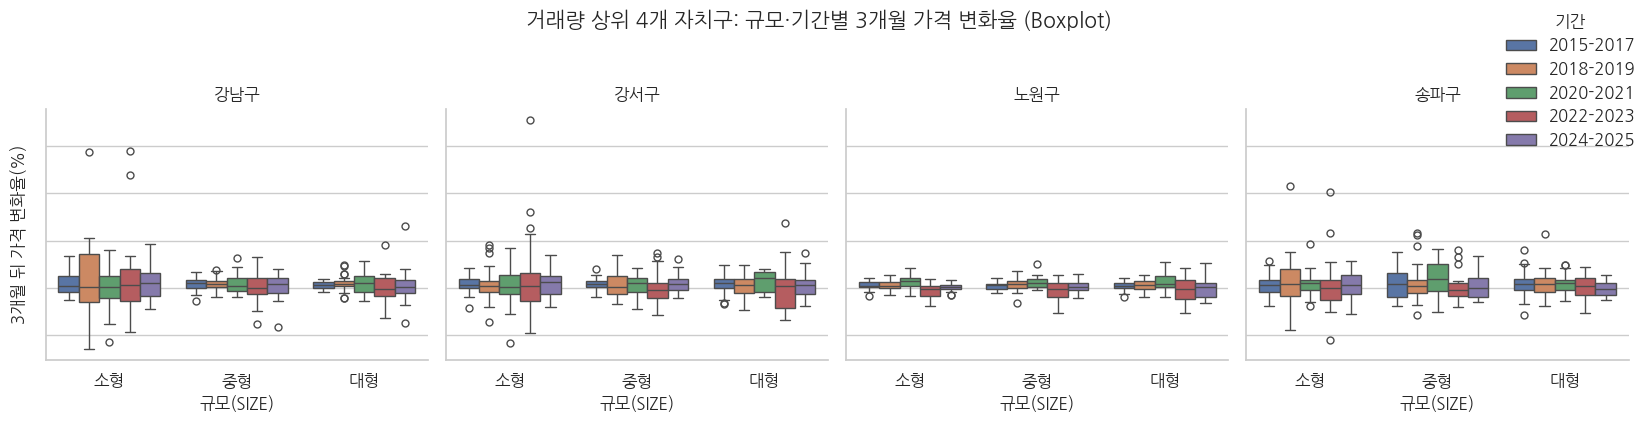

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df=pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v2.csv',encoding='utf-8')

# ---------- 폰트 ----------
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=FONT_PATH)
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False
sns.set_theme(style="whitegrid", font="NanumGothic")

# ---------- boxplot ----------
g = sns.catplot(
    data=df,
    x="SIZE",
    y="VARIABLED",
    hue="YEAR_GROUP",
    col="STATES",
    kind="box",
    height=4,
    aspect=0.95,
    showfliers=True
)

g.set_axis_labels("규모(SIZE)", "3개월 뒤 가격 변화율(%)")
g.set_titles("{col_name}")

g.fig.suptitle(
    "거래량 상위 4개 자치구: 규모·기간별 3개월 가격 변화율 (Boxplot)",
    fontproperties=font_prop,
    fontsize=15,
    y=1.05
)

# ---------- 폰트 강제 적용 (깨짐 방지용) ----------
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontproperties=font_prop)
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop)
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop)

# legend 폰트
if g._legend is not None:
    g._legend.set_title("기간")
    g._legend.get_title().set_fontproperties(font_prop)
    for t in g._legend.texts:
        t.set_fontproperties(font_prop)
g._legend.set_loc("upper right")
plt.tight_layout()
plt.show()
